**Импортируем библиотеку pandas как pd. Загрузим два датасета user_data и logs. Проверим размер таблицы, типы переменных, наличие пропущенных значений.**

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [6]:
user_data.shape

(2954, 3)

In [7]:
logs.shape

(4500, 4)

In [12]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [13]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [20]:
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [28]:
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

**Какой клиент совершил больше всего успешных операций?**

In [63]:
best_client = logs \
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success' : 'count'}) \
    .sort_values('success', ascending = False) \
    .query('success == 41') \
    .sort_values('client')
best_client

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


**С какой платформы осуществляется наибольшее количество успешных операций?**

In [65]:
best_success_platform = logs \
    .query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'success' : 'count'}) \
    .sort_values('success', ascending = False) \
    .head(1)
best_success_platform

,platform,success
1,phone,2019


**Какая платформа наиболее популярна среди премиумных клиентов?**

In [81]:
premium_clients = user_data.query('premium == True')
platform_premium_clients = logs.merge(premium_clients, on = 'client')[['client', 'platform']] \
    .groupby('platform', as_index = False) \
    .agg({'client' : 'count'}) \
    .sort_values('client', ascending = False) \
    .head(1)
platform_premium_clients

,platform,client
1,phone,246


**Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию.**

C:\Users\nastk\AppData\Local\Temp\ipykernel_1696\12102413.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_data.query('premium == False').age)
C:\Users\nastk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nastk\AppData\Local\Temp\ipykernel_1696\12102413.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wit

<Axes: xlabel='age', ylabel='Density'>

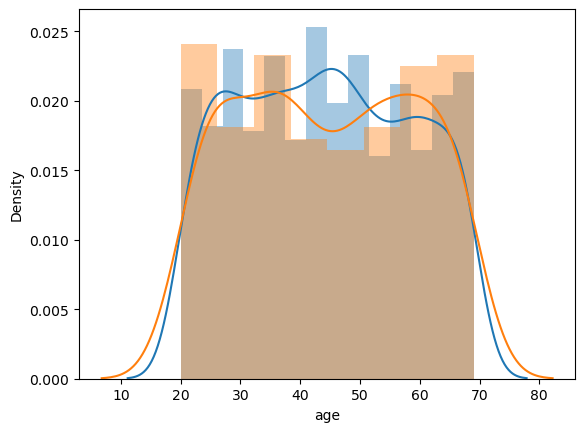

In [96]:
sns.distplot(user_data.query('premium == False').age)
sns.distplot(user_data.query('premium == True').age)

**Построим график распределения числа успешных операций**

<Axes: xlabel='success', ylabel='count'>

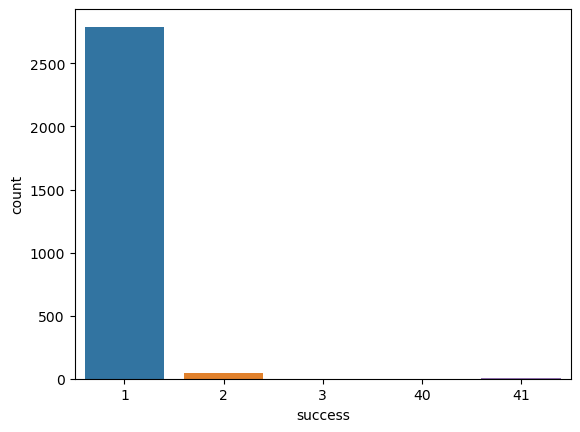

In [101]:
count_success_operations = logs \
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success' : 'count'})
count_success_operations
sns.countplot(count_success_operations, x = 'success')

**Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot.**

In [135]:
users_on_computer = user_data.merge(logs, on = 'client').query('success == True and platform == "computer"')[['age','client']]
users_on_computer

,age,client
3,44,11989
12,24,32406
14,40,62404
20,35,68848
26,48,49675
...,...,...
3414,63,93718
3415,66,13688
3417,69,68348
3427,34,9450


<Axes: xlabel='age', ylabel='count'>

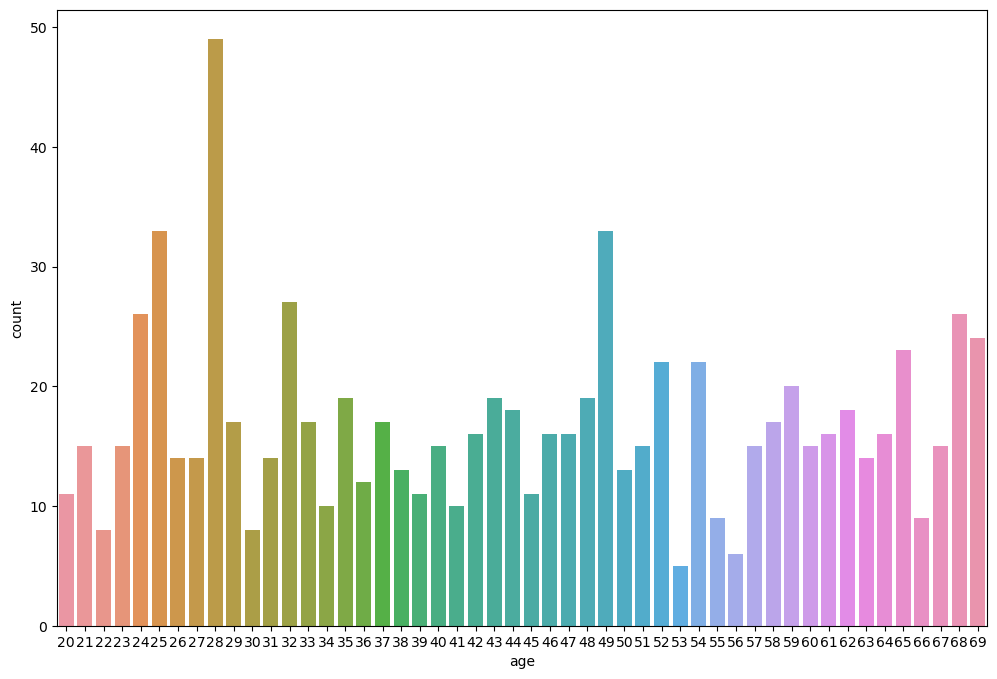

In [138]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data = users_on_computer)